In [41]:
from columntracer import ColumnTracer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

       2.5      5.0      10.0     15.0     20.0
0   0.79858  0.90992  0.97530  0.99197  0.99716
1   0.68921  0.85904  0.96098  0.98727  0.99549
2   0.56799  0.79673  0.94230  0.98097  0.99322
3   0.44466  0.72419  0.91871  0.97276  0.99021
4   0.32919  0.64364  0.88977  0.96231  0.98629
5   0.22958  0.55821  0.85524  0.94926  0.98128
6   0.15033  0.47151  0.81509  0.93331  0.97499
7   0.09217  0.38726  0.76955  0.91415  0.96720
8   0.05280  0.30880  0.71911  0.89156  0.95771
9   0.02820  0.23875  0.66455  0.86537  0.94630
10  0.01402  0.17878  0.60686  0.83551  0.93276
11  0.00648  0.12953  0.54722  0.80201  0.91692
12  0.00278  0.09072  0.48691  0.76503  0.89862
13  0.00111  0.06137  0.42724  0.72482  0.87775
14  0.00041  0.04008  0.36949  0.68179  0.85425
15  0.00014  0.02525  0.31477  0.63644  0.82814
16  0.00004  0.01534  0.26404  0.58940  0.79952
17  0.00001  0.00898  0.21800  0.54138  0.76864
18  0.00000  0.00507  0.17710  0.49322  0.73590
19  0.00000  0.00275  0.14160  0.44591  

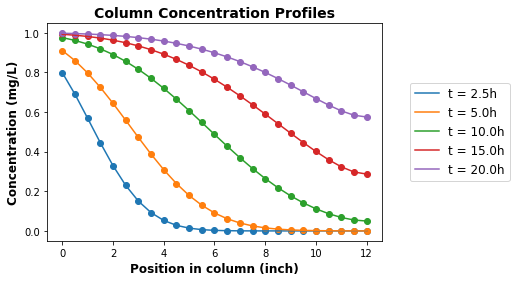

In [46]:
%matplotlib inline

# import data from the report
data = pd.read_csv('data_report.csv') 
# print if needed
# print(data)

# concentration = 1 mg/L, velocity = 0.6 in/h, dispersion coefficient = 0.6 in^2/h
# length = 12 inches, number of roots used = 50
c = ColumnTracer(C0 = 1,
                 U = 0.6,
                 D = 0.6,
                 L = 12,
                 n = 50)

default_t = [2.5, 5, 10, 15, 20]

# x coordinate in inches
default_pos = np.linspace(0,12,25) / 12

c_profile = c.concentration_profile(times = default_t, 
                                    positions = default_pos, 
                                    plot = False, 
                                    print_conc = False)

# dataframe for storing result
df = pd.DataFrame() 

# plotting
fig, ax = plt.subplots()
ax.set_xlabel('Position in column (inch)', size = 12, weight = 'bold')
ax.set_ylabel('Concentration (mg/L)', size = 12, weight = 'bold')
ax.set_title('Column Concentration Profiles', size = 14, weight = 'bold')

for t, cs in zip(default_t, c_profile):
    # plot columntracer simulation result
    ax.plot(default_pos * 12, cs, label = 't = {:.1f}h'.format(t)) 
    
    # results from the report as scatter plot 
    ax.scatter(default_pos * 12, data[str(t)]) 
    
    df[t]=cs
    
ax.legend(loc = 'right', bbox_to_anchor = (1.4, 0.5), fontsize = 12)

# print the result
print(df.round(5)) 

# export data if needed
# df.to_csv('example2.csv') 